**Выполнил:**

Кондрашов Даниил

Магистратура 1 курс ИННОД

- [X] Самостоятельно реализовать функцию **gradient_descent(X, y)**, которая по заданной обучающей выборке обучает модель линейной регрессии, оптимизируя функционал **методом градиентного спуска (Batch Gradient Descent, GD)** и возвращая вектор весов **w**. В качестве функционала можно выбрать, например, функцию ошибок **MSE** + $L_2$-регуляризатор. Использовать матрично-векторные операции для вычисления градиента.
- [X] Найти данные, на которых интересно будет решать задачу регрессии. Зависимость целевого признака от нецелевых должна быть не слишком сложной, чтобы обученная линейная модель смогла показать приемлимый результат. В крайнем случае взять данные для предсказания стоимости машин [тут](https://github.com/rustam-azimov/ml-course-itmo/tree/main/data/car_price) (целевой признак для предсказания --- **price**).
- [X] Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (**Data Cleaning**).
- [X] Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи регрессии.
- [X] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).
- [X] Случайным образом разбить данные на **обучающую** и **тестовую** выборки, используя методы существующих библиотек.
- [X] При обучении моделей использовать **масштабирование данных**.
- [X] Обучить модель на обучающей выборке, используя функцию **gradient_descent(X, y)**. Оценить качество модели на обучающей и тестовой выборках, используя **MSE**, **RMSE** и $R^2$.
- [X] Обучить модель, используя существующую библиотеку. Например, в **sklearn** для $L_2$-регуляризатора можно использовать **Ridge**. Сравнить качество с Вашей реализацией.
- [X] Повторить тоже самое, но используя **кросс-валидацию**.
- [X] Создать таблицу, со строками (mse-train, mse-test, rmse-train, rmse-test, r2-train, r2-test) и столбцами (Fold1, Fold2, ..., Foldk, E, STD), где k --- количество фолдов в кросс-валидации, **E** --- мат. ожидание и **STD** --- стандартное отклонение. Сделать выводы.
- [X] * (+2 балла) Перед обучением моделей подобрать наилучшее количество (и само подмножество) признаков, например используя **Recursive Feature Elimination (RFE)** из **sklearn**.
- [X] * (+1 балл) Во все ваши реализации добавить возможность настройки нужных **гиперпараметров**, а в процессе обучения **всех** моделей осуществить подбор оптимальных значений этих гиперпараметров.
- [X] * (+1 балл) Также самостоятельно реализовать **метод стохастического градиентного спуска (Stochastic Gradient Descent, SGD)**, обучить модели и добавить их во все сравнения.
- [X] * (+1 балл) Также самостоятельно реализовать **метод мини-пакетного градиентного спуска (Mini Batch Gradient Descent)**, обучить модели и добавить их во все сравнения.

# **Импорт библиотек**

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

In [79]:
np.random.seed(42)

# **Загрузка данных**

Данные можно скачать [тут](https://www.kaggle.com/datasets/whenamancodes/credit-card-customers-prediction).

In [80]:
data = pd.read_csv('BankChurners.csv')

# **Постановка задачи**

Для данного набора данных будем решать задачу предсказания лимита по кредитной карте (задача регресии). Целевая переменная - **Credit_Limit**

# **EDA**

## **Краткое описание данных**

- **Clientnum** - id клиента
- **Attrition_Flag** - активность клиента (счёт закрыт - 1, иначе - 0)
- **Customer_age** - возраст клиента
- **Gender** - пол клиента
- **Dependent_count** - количество иждевенцев у клиента
- **Education_level** - уровень образования клиента
- **Marital_Status** - семейное положение клиента
- **Income_category** - категория дохода за год (<40, 40-60, 60-80, 80-120 тыс. долларов США)
- **Card_category** - категория карты (синяя < серебрянная < золотая < платиновая)
- **Months_on_book** - период сотрудничества с банком
- **Total_Relationship_Count** - общее количество товаров, имеющихся у клиента
- **Months_Inactive_12_mon** - количество неактивных месяцев за последние 12 месяцев
- **Contacts_Count_12_mon** - количество контактов за последние 12 месяцев
- **Credit_Limit** - кредитный лимит по кредитной карте
- **Total_Revolving_Bal** - общий возобновляемый баланс
- **Avg_Opent_To_Buy** - кредитная линия "открыта для покупки" (среднее значение за последние 12 месяцев)
- **Total_Amt_Chng_Q4_Q1** - изменение количества транзакций (Q4 по сравнению с Q1)
- **Avg_Utilization_Ratio** - средний коэффициент использования карты
- **и так далее**

Удалим сразу ненужные столбцы.

In [81]:
data = data.drop(columns=[
    'CLIENTNUM',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
])

Посмотрим на столбцы и пропуски.

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

Взглянем на сами данные.

In [83]:
data.sample(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
3781,Existing Customer,48,F,3,Uneducated,Single,Less than $40K,Blue,39,4,3,4,2991.0,1508,1483.0,0.703,3734,64,0.882,0.504
2922,Existing Customer,59,M,1,Uneducated,Single,Less than $40K,Blue,53,5,5,4,2192.0,1569,623.0,0.706,4010,79,0.717,0.716
5070,Existing Customer,37,F,2,Graduate,Divorced,Less than $40K,Blue,36,4,3,3,1734.0,987,747.0,0.879,4727,67,0.914,0.569
7246,Existing Customer,47,M,3,Doctorate,Divorced,$40K - $60K,Blue,36,4,2,3,4786.0,1516,3270.0,0.940,4973,74,0.850,0.317
623,Existing Customer,42,M,3,Unknown,Single,$80K - $120K,Blue,33,3,3,2,3714.0,2170,1544.0,0.524,1454,35,0.522,0.584


Посмотрим на распределение целевой переменной.

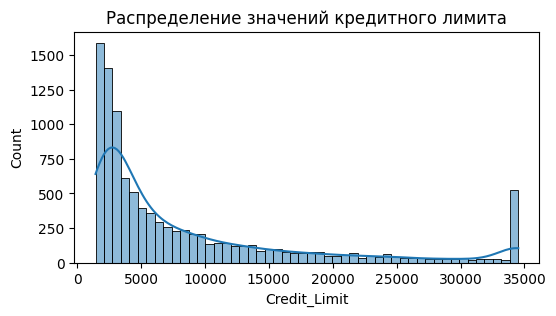

In [84]:
plt.figure(figsize=(6, 3))
sns.histplot(data=data, x='Credit_Limit', kde=True, bins=50)
plt.title('Распределение значений кредитного лимита')
plt.show()

Распределение не соответствует нормальному + наблюдается два пика. Это нужно будет учитывать при обучении.

## **Первичный анализ данных**

Выделим численные и категориальные признаки.

**Численные.**

In [85]:
num_cols = [
    'Customer_Age',
    'Dependent_count',
    'Months_on_book',
    'Total_Relationship_Count',
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon',
    'Total_Revolving_Bal',
    'Avg_Open_To_Buy',
    'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt',
    'Total_Trans_Ct',
    'Total_Ct_Chng_Q4_Q1',
    'Avg_Utilization_Ratio'
]

**Категориальные.**

In [86]:
cat_cols = [
    'Attrition_Flag',
    'Education_Level',
    'Gender',
    'Marital_Status',
    'Income_Category',
    'Card_Category'
]

### **Численные признаки**

Сначала посмотрим на распределение численных признаков.

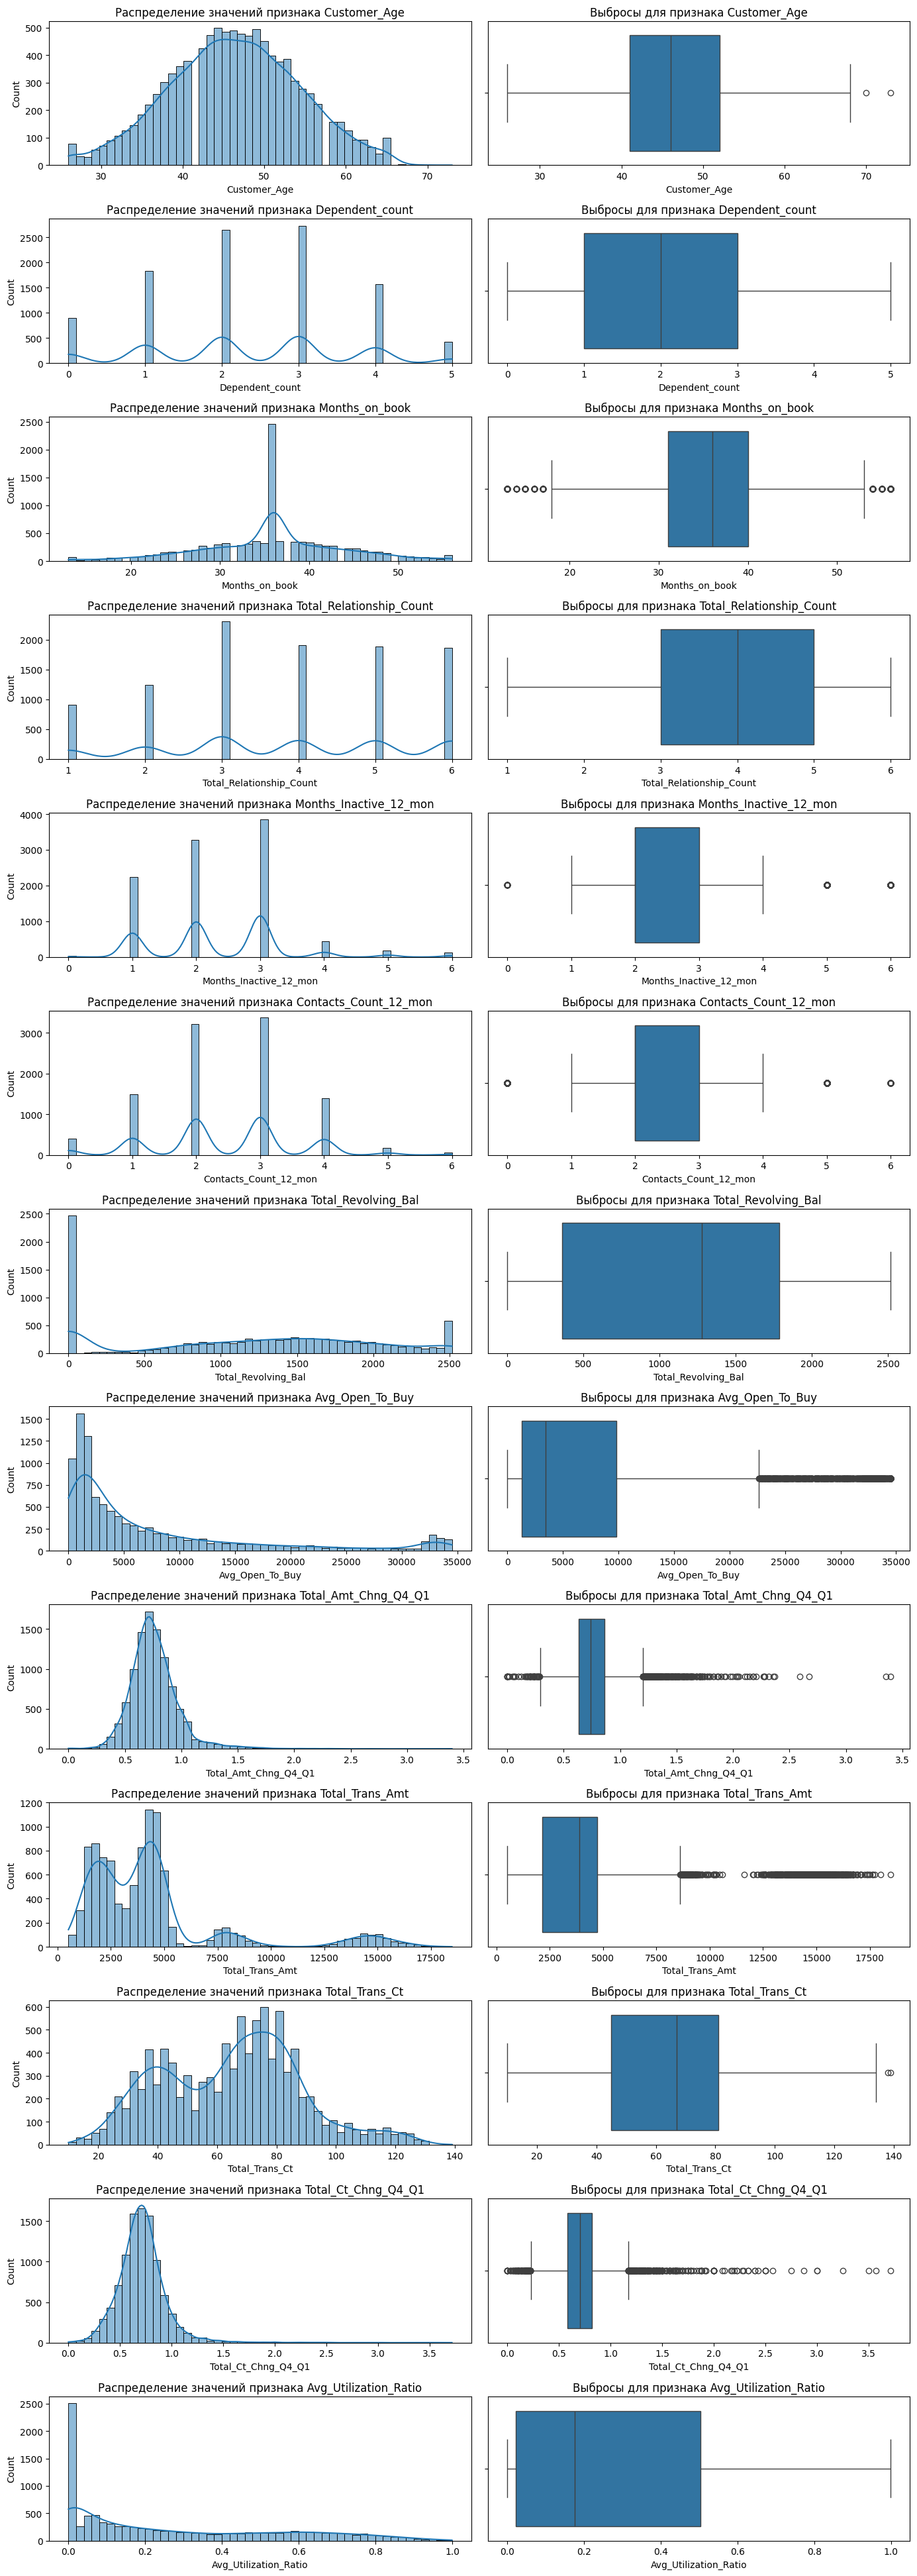

In [87]:
num_rows = len(num_cols)

plt.figure(figsize=(14, 3*num_rows))

for i, col in enumerate(num_cols):
    plt.subplot(num_rows, 2, i*2+1)
    sns.histplot(data=data, x=col, kde=True, bins=50)
    plt.title(f'Распределение значений признака {col}')

    plt.subplot(num_rows, 2, i*2+2)
    sns.boxplot(data=data, x=col)
    plt.title(f'Выбросы для признака {col}')

plt.tight_layout()
plt.show()

**Выводы по распределению значений численных признаков:**
- **Customer_Age:** выбросов нет, распределение нормальное и вопросов не вызывает.
- **Dependent_count:** тут тоже всё хорошо, можно ничего не делать.
- **Months_on_book:** в принципе всё не плохо, но стоит посмотреть более внимательно на значения, возможно есть выбросы.
- **Total_Relationship_Count:** всё хорошо, можно ничего не делать.
- **Months_Inactive_12_mon** стоит посмотреть есть ли выбросы.
- **Contacts_Count_12_mon:** также стоит посмотреть на выбросы.
- **Total_Revolving_Bal:** тут, вроде, всё не плохо, но некоторые вопросы вызывает второй пик.
- **Avg_Open_To_Buy:** тут уже всё сильно хуже с распределением, много значений за доверительным диапазоном.
- **Total_Amt_Chng_Q4_Q1:** тут 100% есть выбросы, стоит проанализировать этот признак подробнее.
- **Total_Trans_Amt:** тут вообще 3 пика в распределении, стоит посмотреть на признак подробнее.
- **Total_Trans_Ct:** тут всё не плохо, но стоит посмотреть на выбросы.
- **Total_Ct_Chng_Q4_Q1:** много выбросов, нужно их обрабатывать.
- **Avg_Utilization_Ratio:** тут всё хорошо, ничего делать не нужно. 

Посмотрим на корреляцию числовых признаков с целевой переменной.

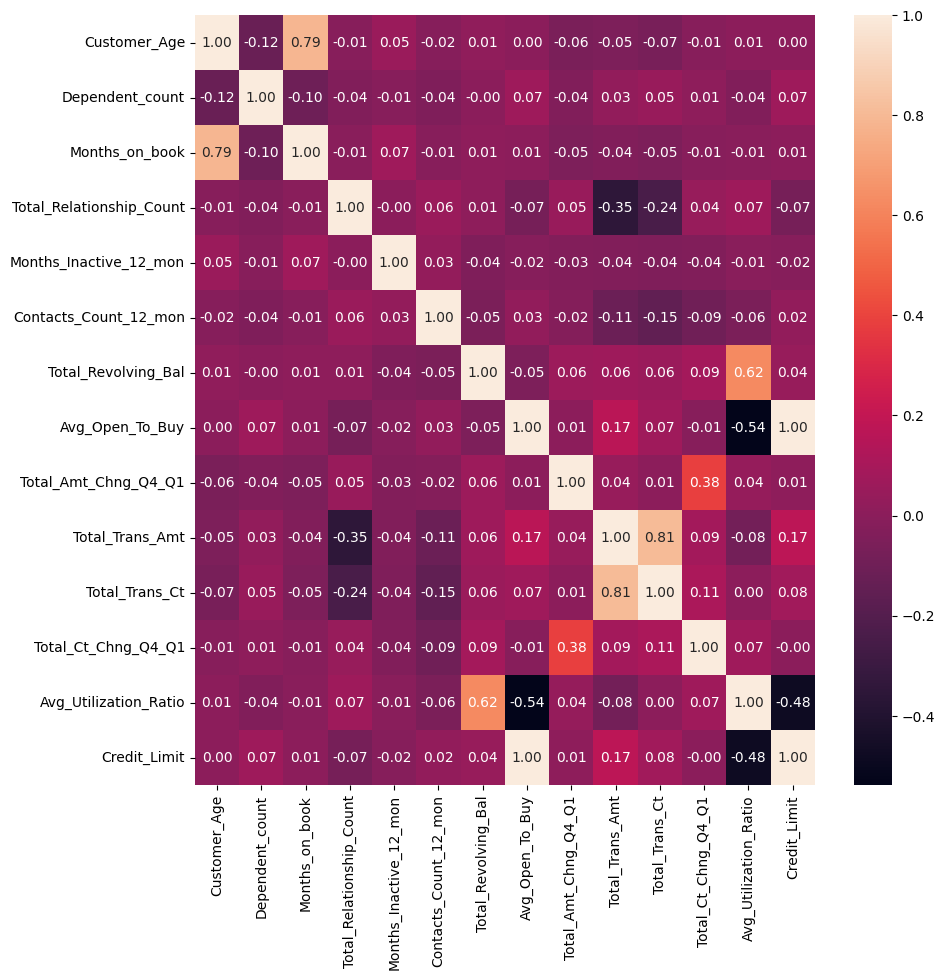

In [88]:
num_cols_with_target = num_cols + ['Credit_Limit']

plt.figure(figsize=(10, 10))
sns.heatmap(data=data[num_cols_with_target].corr(), annot=True, fmt='.2f')
plt.show()

**Выводы:**
- **Оставляем:**
    - Dependent_count - посмотрим на корреляцию подробнее
    - Total_Relationship_Count - посмотрим на корреляцию подробнее
    - Total_Trans_Amt
    - Avg_Utilization_Ratio
- **Удаляем**
    - Customer_Age
    - Months_on_book
    - Months_Inactive_12_mon
    - Contacts_Count_12_mon
    - Total_Revolving_Bal - слишком большая корреляция с признаком Avg_Utilization_Ratio
    - Total_Amt_Chng_Q4_Q1
    - Total_Ct_Chng_Q4_Q1

Удалим соответствующие признаки.

In [89]:
data = data.drop(columns=[
    'Customer_Age',
    'Months_on_book',
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon',
    'Total_Revolving_Bal',
    'Total_Amt_Chng_Q4_Q1',
    'Total_Ct_Chng_Q4_Q1'
])

#### **Total_Trans_Amt**

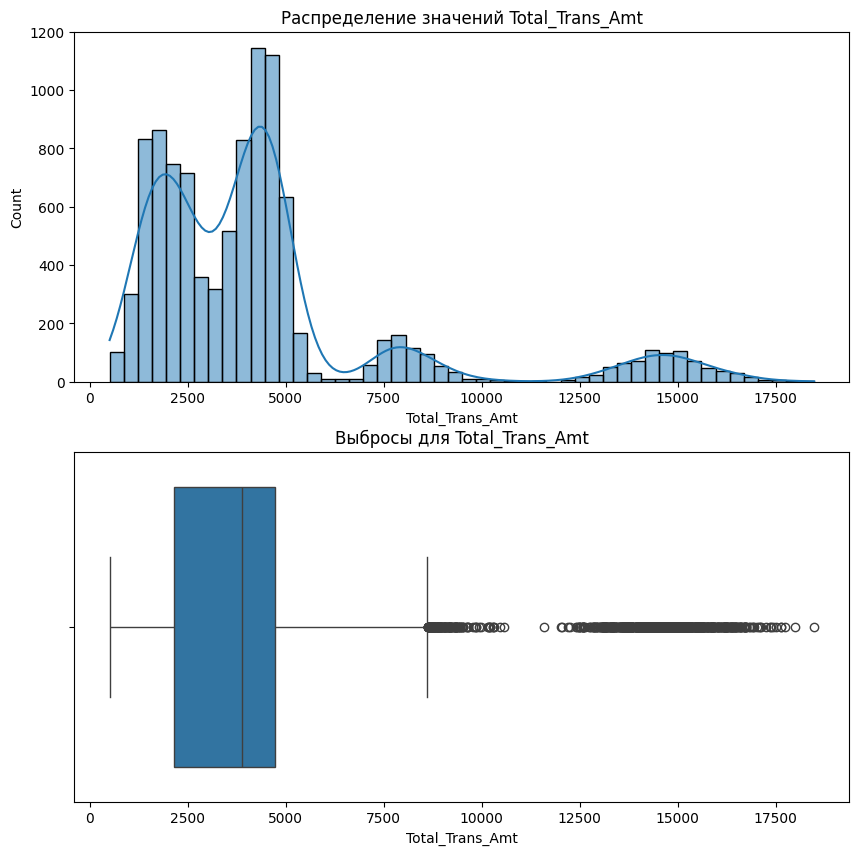

In [90]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
sns.histplot(data=data, x='Total_Trans_Amt', kde=True, bins=50)
plt.title('Распределение значений Total_Trans_Amt')

plt.subplot(2, 1, 2)
sns.boxplot(data=data, x='Total_Trans_Amt')
plt.title('Выбросы для Total_Trans_Amt')

plt.show()

In [91]:
data.query('6000 < Total_Trans_Amt and Total_Trans_Amt < 10500').shape[0]

702

In [92]:
data.query('12000 < Total_Trans_Amt and Total_Trans_Amt < 18000').shape[0]

745

В принципе, при более детальном анализе можно сказать, что прям выбросов нет, поэтому нечего делать не будем.

### **Категориальные признаки**

Сначала преобразуем признаки.

In [93]:
data[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Attrition_Flag   10127 non-null  object
 1   Education_Level  10127 non-null  object
 2   Gender           10127 non-null  object
 3   Marital_Status   10127 non-null  object
 4   Income_Category  10127 non-null  object
 5   Card_Category    10127 non-null  object
dtypes: object(6)
memory usage: 474.8+ KB


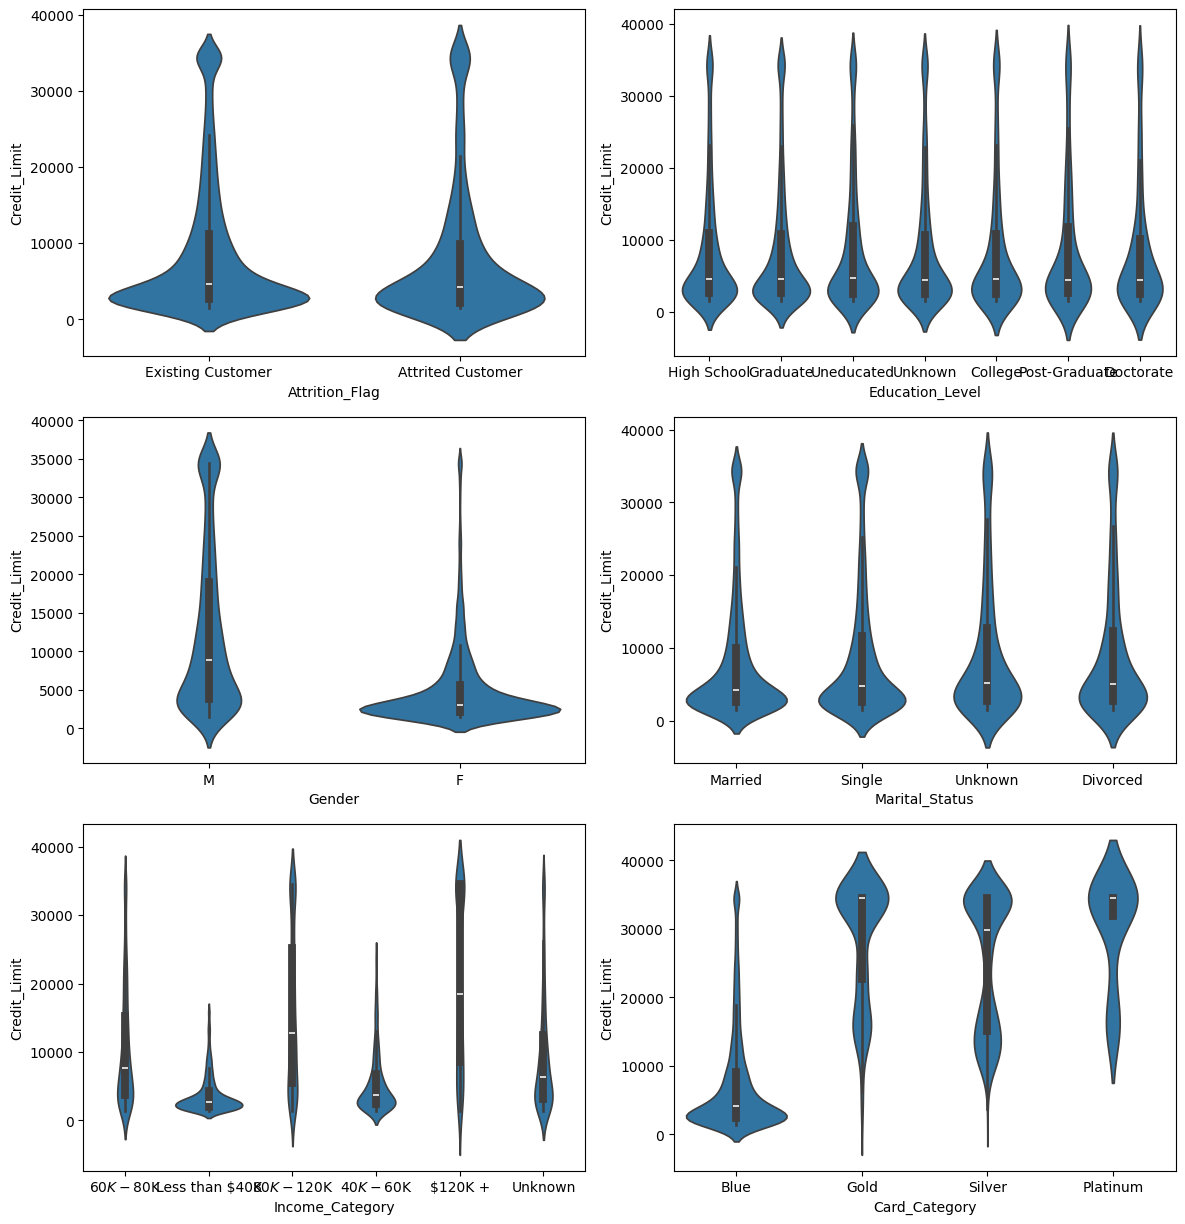

In [94]:
num_rows = len(cat_cols)

plt.figure(figsize=(12, 4*(num_rows // 2 + 1)))

for i, col in enumerate(cat_cols):
    plt.subplot(num_rows // 2 + 1, 2, i + 1)
    sns.violinplot(data=data, x=col, y='Credit_Limit')

plt.tight_layout()
plt.show()

Сейчас наиболее значимыми кажутся признаки:
- Gender
- Marital_Status
- Income_Category
- Card_Category

Также обработаем значение Unknown в признаках.

In [95]:
data['Education_Level'] = data['Education_Level'].replace('Unknown', 'Unknown education level')
data['Marital_Status'] = data['Marital_Status'].replace('Unknown', 'Unknown marital status')
data['Income_Category'] = data['Income_Category'].replace('Unknown', 'Unknown income category')

Однако преобразуем ещё книги и посмотрим на корреляцию уже переработанных признак.

In [96]:
cat_cols = []

Attrition_Flag_ohe = pd.get_dummies(data['Attrition_Flag'], drop_first=True).astype(int)
data = pd.concat([data, Attrition_Flag_ohe], axis=1)
data = data.drop(columns='Attrition_Flag')
cat_cols += Attrition_Flag_ohe.columns.to_list()

Education_Lavel_Flag_ohe = pd.get_dummies(data['Education_Level'], drop_first=True).astype(int)
data = pd.concat([data, Education_Lavel_Flag_ohe], axis=1)
data = data.drop(columns='Education_Level')
cat_cols += Education_Lavel_Flag_ohe.columns.to_list()

Gender_Flag_ohe = pd.get_dummies(data['Gender'], drop_first=True).astype(int)
data = pd.concat([data, Gender_Flag_ohe], axis=1)
data = data.drop(columns='Gender')
cat_cols += Gender_Flag_ohe.columns.to_list()

Marital_Status_Flag_ohe = pd.get_dummies(data['Marital_Status'], drop_first=True).astype(int)
data = pd.concat([data, Marital_Status_Flag_ohe], axis=1)
data = data.drop(columns='Marital_Status')
cat_cols += Marital_Status_Flag_ohe.columns.to_list()

Income_Category_Status_Flag_ohe = pd.get_dummies(data['Income_Category'], drop_first=True).astype(int)
data = pd.concat([data, Income_Category_Status_Flag_ohe], axis=1)
data = data.drop(columns='Income_Category')
cat_cols += Income_Category_Status_Flag_ohe.columns.to_list()

Card_Category_Status_Flag_ohe = pd.get_dummies(data['Card_Category'], drop_first=True).astype(int)
data = pd.concat([data, Card_Category_Status_Flag_ohe], axis=1)
data = data.drop(columns='Card_Category')
cat_cols += Card_Category_Status_Flag_ohe.columns.to_list()

Теперь посмотрим на корреляцию ещё раз.

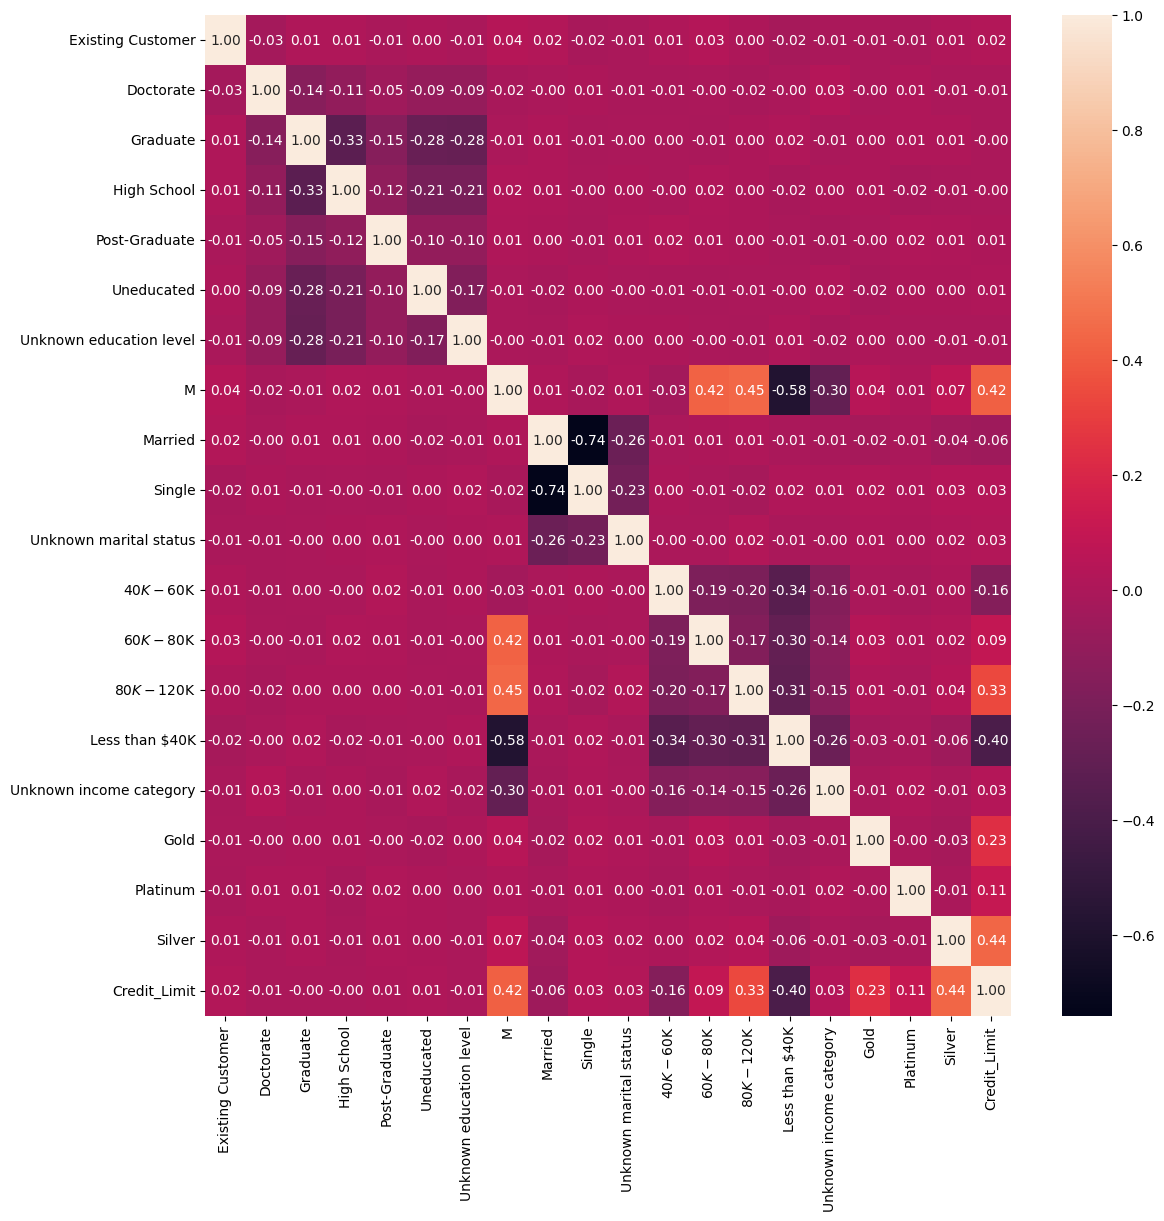

In [97]:
plt.figure(figsize=(13, 13))
sns.heatmap(data=data[cat_cols + ['Credit_Limit']].corr(), annot=True, fmt='.2f')
plt.show()

Оставим следующие наиболее значимые признаки:
- M - пол клиента (мужчина или нет);
- Income Category (все категории);
- Card Category (все категории).

Остальные признаки, как малозначимые, удалим.

In [98]:
data = data.drop(columns=[
    'Existing Customer',
    'Doctorate',
    'Graduate',
    'Post-Graduate',
    'Uneducated',
    'Unknown education level',
    'Married',
    'Single',
    'Unknown marital status'    
])

# **Создание и обучение модели линейной регресии**

## **Создание классов линейной регрессии**

**Линейная регрессия с расчётом градиента по всему датасету.**

In [99]:
class MyLinearRegression():
    def __init__(self):
        self.w = None

    def __calc_gradient__(self, X, y, y_pred, reg, reg_rate):
        grad = (2. / X.shape[0]) * (X.T @ (y_pred - y))

        if reg:
            if reg == 'l1':
                grad += reg_rate * np.sign(self.w)
            elif reg == 'l2':
                grad += reg_rate * 2 * self.w

        return grad

    def fit(self, X, y, learning_rate=0.01, reg = None, reg_rate = 0.001, max_iter=100):
        X = np.array(X)
        y = np.array(y)

        y = y[:, np.newaxis]
        l, n = X.shape

        X_train = np.hstack((X, np.ones((l, 1))))

        self.w = np.random.randn(n + 1, 1)

        self.losses = []

        for _ in range(max_iter):
            y_pred = self.predict(X)
            self.losses.append(mean_squared_error(y, y_pred))

            grad = self.__calc_gradient__(X_train, y, y_pred, reg, reg_rate)

            self.w -= learning_rate * grad
    
    def predict(self, X):
        l, n = X.shape

        X_train = np.hstack((X, np.ones((l, 1))))

        y_pred = X_train @ self.w

        return y_pred

    def get_weights(self):
        return self.w.copy()

    def get_losses(self):
        return self.losses

**SGD линейная регрессия.**

In [100]:
class MySGDLinearRegression(MyLinearRegression):
    def __init__(self):
        super().__init__()

    def fit(self, X, y, learning_rate=0.01, reg=None, reg_rate=0.001, max_iter=100):
        X = np.array(X)
        y = np.array(y)

        y = y[:, np.newaxis]
        l, n = X.shape

        X_train = np.hstack((X, np.ones((l, 1))))

        self.w = np.random.randn(n + 1, 1)

        self.losses = []

        for _ in range(max_iter):
            random_idx = np.random.randint(0, len(X))

            y_pred = self.predict(X[random_idx:random_idx+1])
            self.losses.append(mean_squared_error(y[random_idx:random_idx+1], y_pred))

            grad = self.__calc_gradient__(X_train[random_idx:random_idx+1], y[random_idx:random_idx+1], y_pred, reg, reg_rate)

            self.w -= learning_rate * grad

**Линейная регрессия я mini-batch градиентным спуском.**

In [101]:
class MyMiniBatchGDLinearRegression(MyLinearRegression):
    def __init__(self):
        super().__init__()

    def fit(self, X, y, learning_rate=0.01, reg=None, reg_rate=0.001, max_iter=100, batch_size=10):
        X = np.array(X)
        y = np.array(y)

        y = y[:, np.newaxis]
        l, n = X.shape

        X_train = np.hstack((X, np.ones((l, 1))))

        self.w = np.random.randn(n + 1, 1)

        self.losses = []

        for _ in range(max_iter):
            random_indices = np.random.choice(len(X_train), size=batch_size, replace=False)

            y_pred = self.predict(X[random_indices])
            self.losses.append(mean_squared_error(y[random_indices], y_pred))

            grad = self.__calc_gradient__(X_train[random_indices], y[random_indices], y_pred, reg, reg_rate)

            self.w -= learning_rate * grad

## **Обучение моделей**

In [102]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='Credit_Limit'), data['Credit_Limit'], test_size=0.2, random_state=42)

In [103]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train, )
X_test = scaler.transform(X_test)

**Подбор оптимальных гиперпараметров.**

In [104]:
pipeline = Pipeline([
    ('model', LinearRegression())
])

# Расширенная сетка параметров для разных моделей
param_grid = [
    # Linear Regression
    {
        'model': [LinearRegression()],
        'model__fit_intercept': [True, False]
    },
    # Ridge Regression
    {
        'model': [Ridge()],
        'model__alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
        'model__solver': ['auto', 'svd', 'cholesky', 'lsqr'],
        'model__fit_intercept': [True, False]
    },
    # Lasso Regression
    {
        'model': [Lasso()],
        'model__alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
        'model__fit_intercept': [True, False],
        'model__selection': ['cyclic', 'random']
    },
    # ElasticNet
    {
        'model': [ElasticNet()],
        'model__alpha': [0.001, 0.01, 0.1, 1.0],
        'model__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
        'model__fit_intercept': [True, False]
    }
]

# GridSearch с разными моделями
grid_search_comprehensive = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

grid_search_comprehensive.fit(X_train, y_train)

Fitting 5 folds for each of 110 candidates, totalling 550 fits


,estimator,Pipeline(step...egression())])
,param_grid,"[{'model': [LinearRegression()], 'model__fit_intercept': [True, False]}, {'model': [Ridge()], 'model__alpha': [0.001, 0.01, ...], 'model__fit_intercept': [True, False], 'model__solver': ['auto', 'svd', ...]}, ...]"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,alpha,0.1


**Сравнение с sklearn реализацией без KFold**

In [105]:
df = pd.DataFrame(columns=['model', 'r2_train', 'r2_test'])

vanilla = MyLinearRegression()
vanilla.fit(X_train, y_train, reg='l1', reg_rate=0.001, max_iter=1000)
df.loc[ len(df.index) ] = ['vanilla', r2_score(y_train, vanilla.predict(X_train)), r2_score(y_test, vanilla.predict(X_test))]

sgd = MySGDLinearRegression()
sgd.fit(X_train, y_train, reg='l1', reg_rate=0.001, max_iter=1000)
df.loc[ len(df.index) ] = ['sgd', r2_score(y_train, sgd.predict(X_train)), r2_score(y_test, sgd.predict(X_test))]

minibatch = MyMiniBatchGDLinearRegression()
minibatch.fit(X_train, y_train, reg='l1', reg_rate=0.001, max_iter=1000)
df.loc[ len(df.index) ] = ['minibatch', r2_score(y_train, minibatch.predict(X_train)), r2_score(y_test, minibatch.predict(X_test))]

df.loc[ len(df.index) ] = ['sklearn', r2_score(y_train, grid_search_comprehensive.predict(X_train)), r2_score(y_test, grid_search_comprehensive.predict(X_test))]

df

,model,r2_train,r2_test
0,vanilla,0.901185,0.904456
1,sgd,0.879568,0.884117
2,minibatch,0.903200,0.905760
3,sklearn,0.996180,0.996252


**Сравнение с sklearn с KFold**

In [106]:
KFold_data = data.copy(deep=True)

In [107]:
X = scaler.transform(KFold_data.drop(columns='Credit_Limit'))
y = KFold_data['Credit_Limit']

In [108]:
kf_df_sklearn = pd.DataFrame(columns=[
    'Fold1', 'Fold2', 'Fold3', 'Fold4', 'Fold5', 'E', 'STD'    
], index=[
    'mse-train', 'mse-test', 'rmse-train', 'rmse-test', 'r2-train', 'r2-test'
])

kf_df_vanilla = kf_df_sklearn.copy(deep=True)
kf_df_sgd = kf_df_sklearn.copy(deep=True)
kf_df_minibatch = kf_df_sklearn.copy(deep=True)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []



i = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    lasso = Lasso(alpha=0.1, fit_intercept=True, selection='cyclic')
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    kf_df_sklearn.iloc[:, i] = [mean_squared_error(y_train, lasso.predict(X_train)), mean_squared_error(y_test, lasso.predict(X_test)),
                                root_mean_squared_error(y_train, lasso.predict(X_train)), root_mean_squared_error(y_test, lasso.predict(X_test)),
                                r2_score(y_train, lasso.predict(X_train)), r2_score(y_test, lasso.predict(X_test))]
    
    vanilla = MyLinearRegression()
    vanilla.fit(X_train, y_train, reg='l1', reg_rate=0.001, max_iter=1000)
    y_pred = vanilla.predict(X_test)
    kf_df_vanilla.iloc[:, i] = [mean_squared_error(y_train, vanilla.predict(X_train)), mean_squared_error(y_test, vanilla.predict(X_test)),
                                root_mean_squared_error(y_train, vanilla.predict(X_train)), root_mean_squared_error(y_test, vanilla.predict(X_test)),
                                r2_score(y_train, vanilla.predict(X_train)), r2_score(y_test, vanilla.predict(X_test))]
    
    sgd = MySGDLinearRegression()
    sgd.fit(X_train, y_train, reg='l1', reg_rate=0.001, max_iter=1000)
    y_pred = sgd.predict(X_test)
    kf_df_sgd.iloc[:, i] = [mean_squared_error(y_train, sgd.predict(X_train)), mean_squared_error(y_test, sgd.predict(X_test)),
                                root_mean_squared_error(y_train, sgd.predict(X_train)), root_mean_squared_error(y_test, sgd.predict(X_test)),
                                r2_score(y_train, sgd.predict(X_train)), r2_score(y_test, sgd.predict(X_test))]
    
    minibatch = MyMiniBatchGDLinearRegression()
    minibatch.fit(X_train, y_train, reg='l1', reg_rate=0.001, max_iter=1000)
    y_pred = minibatch.predict(X_test)
    kf_df_minibatch.iloc[:, i] = [mean_squared_error(y_train, minibatch.predict(X_train)), mean_squared_error(y_test, minibatch.predict(X_test)),
                                root_mean_squared_error(y_train, minibatch.predict(X_train)), root_mean_squared_error(y_test, minibatch.predict(X_test)),
                                r2_score(y_train, minibatch.predict(X_train)), r2_score(y_test, minibatch.predict(X_test))]

    i += 1

kf_df_sklearn['E'] = kf_df_sklearn[['Fold1', 'Fold2', 'Fold3', 'Fold4', 'Fold5']].mean(axis=1)
kf_df_sklearn['STD'] = kf_df_sklearn[['Fold1', 'Fold2', 'Fold3', 'Fold4', 'Fold5']].var(axis=1)

kf_df_vanilla['E'] = kf_df_vanilla[['Fold1', 'Fold2', 'Fold3', 'Fold4', 'Fold5']].mean(axis=1)
kf_df_vanilla['STD'] = kf_df_vanilla[['Fold1', 'Fold2', 'Fold3', 'Fold4', 'Fold5']].var(axis=1)

kf_df_sgd['E'] = kf_df_sgd[['Fold1', 'Fold2', 'Fold3', 'Fold4', 'Fold5']].mean(axis=1)
kf_df_sgd['STD'] = kf_df_sgd[['Fold1', 'Fold2', 'Fold3', 'Fold4', 'Fold5']].var(axis=1)

kf_df_minibatch['E'] = kf_df_minibatch[['Fold1', 'Fold2', 'Fold3', 'Fold4', 'Fold5']].mean(axis=1)
kf_df_minibatch['STD'] = kf_df_minibatch[['Fold1', 'Fold2', 'Fold3', 'Fold4', 'Fold5']].var(axis=1)

In [109]:
kf_df_sklearn

,Fold1,Fold2,Fold3,Fold4,Fold5,E,STD
mse-train,315372.296345,316333.736504,311312.952948,312180.274812,315414.666862,314122.785494,4946761.472923
mse-test,310230.532445,306496.388075,326817.581213,322987.231401,310365.434162,315379.433459,79817419.869582
rmse-train,561.580178,562.43554,557.954257,558.73095,561.617901,560.463765,3.941645
rmse-test,556.983422,553.621159,571.679614,568.319656,557.104509,561.541672,62.979879
r2-train,0.99618,0.996104,0.996286,0.996201,0.99621,0.996196,0.0
r2-test,0.996252,0.996523,0.99579,0.996165,0.996125,0.996171,0.0


In [110]:
kf_df_vanilla

,Fold1,Fold2,Fold3,Fold4,Fold5,E,STD
mse-train,8157670.345595,8172790.346511,8107978.405987,8176814.629346,8133247.158585,8149700.177205,835820258.226882
mse-test,7908937.942513,9078476.202411,7660533.369127,8516087.80876,7758385.43228,8184484.151018,360298256689.252441
rmse-train,2856.163571,2858.809253,2847.451212,2859.513006,2851.884843,2854.764377,25.660584
rmse-test,2812.283404,3013.050979,2767.766856,2918.23368,2785.387842,2859.344552,10791.104015
r2-train,0.901182,0.899344,0.903282,0.900507,0.902265,0.901316,0.000002
r2-test,0.904455,0.897011,0.901318,0.898896,0.903128,0.900961,0.000009


In [111]:
kf_df_sgd

,Fold1,Fold2,Fold3,Fold4,Fold5,E,STD
mse-train,8681870.80474,8815822.841855,8922940.120743,8075960.788669,7926959.474869,8484710.806175,204678825434.596008
mse-test,8414307.326694,9858389.507823,8455465.22113,8339346.523959,7599534.150008,8533408.545923,671404066853.438354
rmse-train,2946.501452,2969.145137,2987.129077,2841.823497,2815.485655,2912.016963,6085.013456
rmse-test,2900.742547,3139.807241,2907.828265,2887.792673,2756.725258,2918.579197,19130.020837
r2-train,0.894833,0.891425,0.893561,0.901734,0.904744,0.897259,0.000032
r2-test,0.898349,0.888163,0.891078,0.900994,0.905111,0.896739,0.000049


In [112]:
kf_df_minibatch

,Fold1,Fold2,Fold3,Fold4,Fold5,E,STD
mse-train,8001371.782561,8005060.551806,8445736.655087,8403502.644711,8274840.618396,8226102.450512,45362203957.768547
mse-test,7779978.061179,8864011.915217,7960506.548441,8748518.976873,7907194.656843,8252042.031711,261938384407.054474
rmse-train,2828.669614,2829.321571,2906.154961,2898.87955,2876.60227,2867.925593,1381.554789
rmse-test,2789.261203,2977.249052,2821.436965,2957.789542,2811.973445,2871.542042,7860.419006
r2-train,0.903076,0.90141,0.899253,0.897748,0.900563,0.90041,0.000004
r2-test,0.906012,0.899444,0.897454,0.896136,0.90127,0.900063,0.000015


**Выводы:**

В целом решение Sklearn лучше, оно более устойчивое, кроме того оно даёт оценку сильно лучше, так как там работа с градиентами лучше, чем у меня.

Также можно сказать, что в данных нет особых выбросов, так как на каждом из фолдов качество примерно одинаковое, значит данные я обработал хорошо.